In [270]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [271]:
data_dir = "../data/processed/single_label/"

In [272]:
class_enum = {0: "desert", 1: "mountains", 2: "sea", 3: "sunset", 4: "trees"}

In [273]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
                                                                 validation_split=0.2, 
                                                                 subset="training", 
                                                                 seed=123, 
                                                                 label_mode='categorical', 
                                                                 image_size=(128, 128),
                                                                 batch_size=32)

Found 1544 files belonging to 5 classes.
Using 1236 files for training.


In [274]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
                                                               validation_split=0.2, 
                                                               subset="validation", 
                                                               seed=123, 
                                                               label_mode='categorical', 
                                                               image_size=(128, 128),
                                                               batch_size=32)

Found 1544 files belonging to 5 classes.
Using 308 files for validation.


(128, 128, 3)
sea


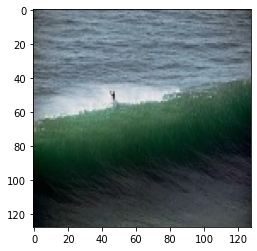

In [275]:
for img, label in train_data.take(1):
    plt.imshow(img[0].numpy().astype('uint8'))
    print(img[0].shape)
    print(class_enum[tf.argmax(label[0]).numpy()])

In [282]:
model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128, 128, 3)),
                             tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                             tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                             tf.keras.layers.Conv2D(12, (3, 3), activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(24, (3, 3), activation="relu"),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPooling2D(),
                             #tf.keras.layers.Conv2D(48, (3, 3), activation="relu"),
                             #tf.keras.layers.BatchNormalization(),
                             #tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation="relu", 
                                            kernel_regularizer=tf.keras.regularizers.L2(0.001)),
                             tf.keras.layers.Dropout(0.5),
                             #tf.keras.layers.Dense(32, activation="relu",
                             #              kernel_regularizer=tf.keras.regularizers.L2(0.001)),
                             #tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(5)])

In [287]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", min_delta=0)
learning_rate = tf.keras.optimizers.schedules.InverseTimeDecay(0.0001, 3, 0.5)
opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

model.compile(optimizer=opt, loss=loss, metrics="acc")

hist = model.fit(x=train_data,epochs=25, validation_data=val_data, verbose=2)

Epoch 1/25
39/39 - 26s - loss: 1.4029 - acc: 0.5105 - val_loss: 1.1207 - val_acc: 0.5714
Epoch 2/25
39/39 - 29s - loss: 1.2479 - acc: 0.5453 - val_loss: 1.0987 - val_acc: 0.5682
Epoch 3/25
39/39 - 32s - loss: 1.2413 - acc: 0.5494 - val_loss: 1.1071 - val_acc: 0.5779
Epoch 4/25
39/39 - 30s - loss: 1.2147 - acc: 0.5712 - val_loss: 1.1032 - val_acc: 0.5779
Epoch 5/25
39/39 - 30s - loss: 1.2156 - acc: 0.5607 - val_loss: 1.0971 - val_acc: 0.5682
Epoch 6/25
39/39 - 31s - loss: 1.2578 - acc: 0.5485 - val_loss: 1.0894 - val_acc: 0.5844
Epoch 7/25
39/39 - 31s - loss: 1.2207 - acc: 0.5526 - val_loss: 1.0828 - val_acc: 0.5779
Epoch 8/25
39/39 - 32s - loss: 1.2191 - acc: 0.5558 - val_loss: 1.0777 - val_acc: 0.5747
Epoch 9/25
39/39 - 32s - loss: 1.1988 - acc: 0.5502 - val_loss: 1.0775 - val_acc: 0.5747
Epoch 10/25
39/39 - 31s - loss: 1.2070 - acc: 0.5728 - val_loss: 1.0761 - val_acc: 0.5682
Epoch 11/25
39/39 - 35s - loss: 1.1978 - acc: 0.5858 - val_loss: 1.0746 - val_acc: 0.5714
Epoch 12/25
39/39 -

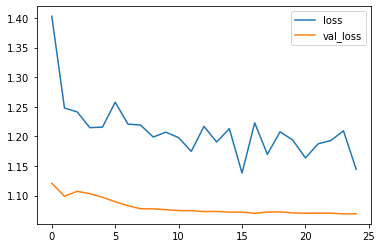

In [288]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()

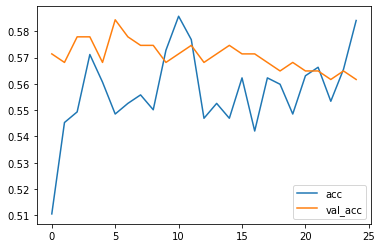

In [289]:
plt.plot(hist.history["acc"], label="acc")
plt.plot(hist.history["val_acc"], label="val_acc")
plt.legend()